## Install super-gradients, roboflow and supervision


In [ ]:
!pip install git+https://github.com/Deci-AI/super-gradients.git@stable
!pip install roboflow
!pip install supervision

  Cloning https://github.com/Deci-AI/super-gradients.git (to revision stable) to /tmp/pip-req-build-g_grn0zv
  Running command git clone --filter=blob:none --quiet https://github.com/Deci-AI/super-gradients.git /tmp/pip-req-build-g_grn0zv
  Running command git checkout -q 780b81bdc7bb8ed88b81a71a939cc3e841f38af8
  Resolved https://github.com/Deci-AI/super-gradients.git to commit 780b81bdc7bb8ed88b81a71a939cc3e841f38af8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 14.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 73.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.7 M

## Inference with pre-trained COCO model

In [ ]:
import torch
from super_gradients.training import models
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

[2023-11-09 04:12:22] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2023-11-09 04:12:22] WARNING - __init__.py - Failed to import pytorch_quantization
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[2023-11-09 04:12:33] INFO - utils.py - NumExpr defaulting to 4 threads.
[2023-11-09 04:12:36] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-11-09 04:12:36] WARNING - export.py - Failed to import pytorch_quantization
[2023-11-09 04:12:36] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-11-09 04:12:36] INFO - env_sanity_check.py - Library check is not supported when super_gradients installed through "git+https://github.com/..." command


In [ ]:
device = 'cuda' if torch.cuda.is_available() else "cpu"
model_architecture = 'yolo_nas_l'

In [ ]:
model = models.get(model_architecture, pretrained_weights="coco").to(device)

[2023-11-09 04:12:37] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth
100%|██████████| 256M/256M [00:11<00:00, 22.9MB/s] 
[2023-11-09 04:12:50] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


### Single Image Inference

In [ ]:
!wget "https://cdn.vox-cdn.com/thumbor/45cp0pAuJNk94PJBIcEgDGvxr6o=/0x0:6720x4480/1200x675/filters:focal(2823x1703:3897x2777)/cdn.vox-cdn.com/uploads/chorus_image/image/65706248/shutterstock_1518835508.0.jpg"

In [ ]:
test_image = "/kaggle/working/shutterstock_1518835508.0.jpg"

In [ ]:
import cv2

image = cv2.imread(test_image)
result = list(model.predict(image, conf=0.35))[0]

--2023-11-09 04:12:56--  https://cdn.vox-cdn.com/thumbor/45cp0pAuJNk94PJBIcEgDGvxr6o=/0x0:6720x4480/1200x675/filters:focal(2823x1703:3897x2777)/cdn.vox-cdn.com/uploads/chorus_image/image/65706248/shutterstock_1518835508.0.jpg
Resolving cdn.vox-cdn.com (cdn.vox-cdn.com)... 199.232.192.124, 199.232.196.124
Connecting to cdn.vox-cdn.com (cdn.vox-cdn.com)|199.232.192.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180803 (177K) [image/jpeg]
Saving to: ‘shutterstock_1518835508.0.jpg’

shutterstock_151883 100%[===================>] 176.57K  --.-KB/s    in 0.02s   

2023-11-09 04:12:56 (10.0 MB/s) - ‘shutterstock_1518835508.0.jpg’ saved [180803/180803]



/opt/conda/lib/python3.10/site-packages/numpy/lib/arraypad.py:487: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x)
[2023-11-09 04:12:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


### Output format

For every image YOLO-NAS will produce `ImageDetectionPrediction` object containing the following fields:
- `image` - `numpy.ndarray` - image used for inference
- `class_names` - `List[str]` - list of categories used for training the model
- `prediction` - `DetectionPrediction` - class instance containing detailed information about the obtained detections
   - `bboxes_xyxy` - `numpy.ndarray` of `float32` and `(N, 4)` shape - detection bounding boxes in `xyxy` format
   - `confidence` - `numpy.ndarray` of `float32` and `(N,)` shape - confidence value between `0` and `1`
   - `labels` - `numpy.ndarray` of `float32` and `(N,)` shape - `class_id` related to the index in the `class_names` list

In [ ]:
type(result)

super_gradients.training.utils.predict.prediction_results.ImageDetectionPrediction

### Visualize Inference Result

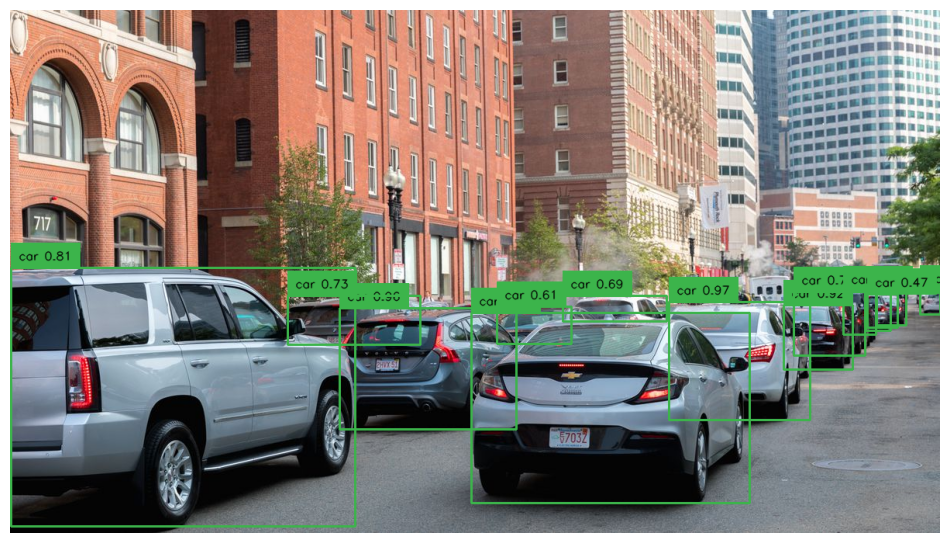

In [ ]:
import supervision as sv

detections = sv.Detections(
    xyxy=result.prediction.bboxes_xyxy,
    confidence=result.prediction.confidence,
    class_id=result.prediction.labels.astype(int)
)

box_annotator = sv.BoxAnnotator()

labels = [
    f"{result.class_names[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections
]

annotated_frame = box_annotator.annotate(
    scene=image.copy(),
    detections=detections,
    labels=labels
)

%matplotlib inline
sv.plot_image(annotated_frame, (12, 12))

In [ ]:
import roboflow
from roboflow import Roboflow

roboflow.login()

rf = Roboflow()

project = rf.workspace("yolov8-rbuqm").project("detect-vehicles-utnre")
dataset = project.version(11).download("yolov5")

You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Detect-Vehicles-11 in yolov5pytorch::   0%|          | 0/3038 [00:00<?, ?it/s]

Extracting Dataset Version Zip to Detect-Vehicles-11 in yolov5pytorch:: 100%|██████████| 3038/3038 [00:00<00:00, 5948.89it/s]


In [ ]:
loc = dataset.location
print("location:", loc)
classes = sorted(project.classes)
print("classes:", classes)

location: /kaggle/working/Detect-Vehicles-11
classes: ['car', 'coach', 'container', 'truck', 'van']


## Fine-tune on custom dataset

`checkpoint_dir` - this is the directory where results from all your experiments will be saved

`experiment_name` - all checkpoints, logs, and tensorboards will be saved in a directory with the name you specify here.

In [ ]:
batch_size = 8
epochs = 25
checkpoint_dir = f'/kaggle/working/checkpoints'
experiment_name = "Object_detection_vehicles"

In [ ]:
from super_gradients.training import Trainer

trainer = Trainer(experiment_name=experiment_name, ckpt_root_dir=checkpoint_dir)

In [ ]:
dataset_params = {
    'data_dir': loc,
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': classes
}

In [ ]:
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': batch_size,
        'num_workers': 2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': batch_size,
        'num_workers': 2
    }
)
test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': batch_size,
        'num_workers': 1
    }
)

[2023-11-09 04:24:46] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 1392/1392 [00:00<00:00, 4287.95it/s]
[2023-11-09 04:24:47] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 60/60 [00:00<00:00, 4595.15it/s]
[2023-11-09 04:24:47] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 61/61 [00:00<00:00, 4502.62it/s]


**NOTE:** Let's inspect our dataset

In [ ]:
train_data.dataset.transforms

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': (640, 640), 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': (640, 640), 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': (640, 640), 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5),
 DetectionPaddedRescale('additional_samples_count': 0, 'non_em

### Instantiate the model

In [ ]:
model = models.get(
    model_architecture,
    num_classes=len(dataset_params['classes']),
    pretrained_weights="coco"
)

[2023-11-09 04:25:01] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-11-09 04:25:01] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


### Define metrics and training parameters

In [ ]:
train_params = {
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": epochs,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

### Train the model

In [ ]:
trainer.train(
    model=model,
    training_params=train_params,
    train_loader=train_data,
    valid_loader=val_data
)

[2023-11-09 04:26:05] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20231109_042605_770883`
[2023-11-09 04:26:05] INFO - sg_trainer.py - Checkpoints directory: /kaggle/working/checkpoints/Object_detection_vehicles/RUN_20231109_042605_770883
[2023-11-09 04:26:05] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}


The console stream is now moved to /kaggle/working/checkpoints/Object_detection_vehicles/RUN_20231109_042605_770883/console_Nov09_04_26_05.txt


Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
[2023-11-09 04:26:07] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Full dataset size:            1392       (len(train_set))
    - Batch size per GPU:           8          (batch_size)
    - Bat

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 2.4107
│   ├── Ppyoloeloss/loss_iou = 0.5514
│   ├── Ppyoloeloss/loss_dfl = 0.5734
│   └── Ppyoloeloss/loss = 3.5355
└── Validation
    ├── Ppyoloeloss/loss_cls = 2.6551
    ├── Ppyoloeloss/loss_iou = 0.2697
    ├── Ppyoloeloss/loss_dfl = 0.3971
    ├── Ppyoloeloss/loss = 3.3219
    ├── Precision@0.50 = 0.0072
    ├── Recall@0.50 = 0.0
    ├── Map@0.50 = 0.057
    └── F1@0.50 = 0.0



Validating epoch 1: 100%|██████████| 8/8 [00:01<00:00,  4.09it/s]
[2023-11-09 04:30:14] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/Object_detection_vehicles/RUN_20231109_042605_770883/ckpt_best.pth
[2023-11-09 04:30:14] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.78715980052948
Train epoch 2:   0%|          | 0/174 [00:00<?, ?it/s]Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


SUMMARY OF EPOCH 1
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0663
│   │   ├── Epoch N-1      = 2.4107 (↘ -1.3444)
│   │   └── Best until now = 2.4107 (↘ -1.3444)
│   ├── Ppyoloeloss/loss_iou = 0.3956
│   │   ├── Epoch N-1      = 0.5514 (↘ -0.1559)
│   │   └── Best until now = 0.5514 (↘ -0.1559)
│   ├── Ppyoloeloss/loss_dfl = 0.4335
│   │   ├── Epoch N-1      = 0.5734 (↘ -0.1399)
│   │   └── Best until now = 0.5734 (↘ -0.1399)
│   └── Ppyoloeloss/loss = 1.8953
│       ├── Epoch N-1      = 3.5355 (↘ -1.6401)
│       └── Best until now = 3.5355 (↘ -1.6401)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7744
    │   ├── Epoch N-1      = 2.6551 (↘ -1.8807)
    │   └── Best until now = 2.6551 (↘ -1.8807)
    ├── Ppyoloeloss/loss_iou = 0.2653
    │   ├── Epoch N-1      = 0.2697 (↘ -0.0044)
    │   └── Best until now = 0.2697 (↘ -0.0044)
    ├── Ppyoloeloss/loss_dfl = 0.3513
    │   ├── Epoch N-1      = 0.3971 (↘ -0.0458)
    │   └── Best until now = 0.3971 (↘ -0.0458)
    ├── Ppyoloeloss/lo

Train epoch 3:   0%|          | 0/174 [00:00<?, ?it/s]Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


SUMMARY OF EPOCH 2
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.923
│   │   ├── Epoch N-1      = 1.0663 (↘ -0.1433)
│   │   └── Best until now = 1.0663 (↘ -0.1433)
│   ├── Ppyoloeloss/loss_iou = 0.3759
│   │   ├── Epoch N-1      = 0.3956 (↘ -0.0197)
│   │   └── Best until now = 0.3956 (↘ -0.0197)
│   ├── Ppyoloeloss/loss_dfl = 0.4219
│   │   ├── Epoch N-1      = 0.4335 (↘ -0.0116)
│   │   └── Best until now = 0.4335 (↘ -0.0116)
│   └── Ppyoloeloss/loss = 1.7208
│       ├── Epoch N-1      = 1.8953 (↘ -0.1746)
│       └── Best until now = 1.8953 (↘ -0.1746)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7961
    │   ├── Epoch N-1      = 0.7744 (↗ 0.0217)
    │   └── Best until now = 0.7744 (↗ 0.0217)
    ├── Ppyoloeloss/loss_iou = 0.2474
    │   ├── Epoch N-1      = 0.2653 (↘ -0.0179)
    │   └── Best until now = 0.2653 (↘ -0.0179)
    ├── Ppyoloeloss/loss_dfl = 0.3536
    │   ├── Epoch N-1      = 0.3513 (↗ 0.0023)
    │   └── Best until now = 0.3513 (↗ 0.0023)
    ├── Ppyoloeloss/loss = 

Validating epoch 4: 100%|██████████| 8/8 [00:01<00:00,  4.08it/s]
[2023-11-09 04:36:40] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/Object_detection_vehicles/RUN_20231109_042605_770883/ckpt_best.pth
[2023-11-09 04:36:40] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8331540822982788
Train epoch 5:   0%|          | 0/174 [00:00<?, ?it/s]Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


SUMMARY OF EPOCH 4
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.866
│   │   ├── Epoch N-1      = 0.8985 (↘ -0.0325)
│   │   └── Best until now = 0.8985 (↘ -0.0325)
│   ├── Ppyoloeloss/loss_iou = 0.3701
│   │   ├── Epoch N-1      = 0.3836 (↘ -0.0135)
│   │   └── Best until now = 0.3759 (↘ -0.0058)
│   ├── Ppyoloeloss/loss_dfl = 0.4267
│   │   ├── Epoch N-1      = 0.4317 (↘ -0.005)
│   │   └── Best until now = 0.4219 (↗ 0.0048)
│   └── Ppyoloeloss/loss = 1.6628
│       ├── Epoch N-1      = 1.7139 (↘ -0.0511)
│       └── Best until now = 1.7139 (↘ -0.0511)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7491
    │   ├── Epoch N-1      = 0.7715 (↘ -0.0225)
    │   └── Best until now = 0.7715 (↘ -0.0225)
    ├── Ppyoloeloss/loss_iou = 0.2556
    │   ├── Epoch N-1      = 0.2594 (↘ -0.0037)
    │   └── Best until now = 0.2474 (↗ 0.0082)
    ├── Ppyoloeloss/loss_dfl = 0.3731
    │   ├── Epoch N-1      = 0.3687 (↗ 0.0043)
    │   └── Best until now = 0.3513 (↗ 0.0218)
    ├── Ppyoloeloss/loss = 1

Validating epoch 5: 100%|██████████| 8/8 [00:01<00:00,  4.10it/s]
[2023-11-09 04:38:57] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/Object_detection_vehicles/RUN_20231109_042605_770883/ckpt_best.pth
[2023-11-09 04:38:57] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8748964071273804
Train epoch 6:   0%|          | 0/174 [00:00<?, ?it/s]Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


SUMMARY OF EPOCH 5
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8186
│   │   ├── Epoch N-1      = 0.866  (↘ -0.0474)
│   │   └── Best until now = 0.866  (↘ -0.0474)
│   ├── Ppyoloeloss/loss_iou = 0.3584
│   │   ├── Epoch N-1      = 0.3701 (↘ -0.0117)
│   │   └── Best until now = 0.3701 (↘ -0.0117)
│   ├── Ppyoloeloss/loss_dfl = 0.4106
│   │   ├── Epoch N-1      = 0.4267 (↘ -0.0161)
│   │   └── Best until now = 0.4219 (↘ -0.0113)
│   └── Ppyoloeloss/loss = 1.5875
│       ├── Epoch N-1      = 1.6628 (↘ -0.0753)
│       └── Best until now = 1.6628 (↘ -0.0753)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7473
    │   ├── Epoch N-1      = 0.7491 (↘ -0.0018)
    │   └── Best until now = 0.7491 (↘ -0.0018)
    ├── Ppyoloeloss/loss_iou = 0.2735
    │   ├── Epoch N-1      = 0.2556 (↗ 0.0179)
    │   └── Best until now = 0.2474 (↗ 0.0261)
    ├── Ppyoloeloss/loss_dfl = 0.3756
    │   ├── Epoch N-1      = 0.3731 (↗ 0.0025)
    │   └── Best until now = 0.3513 (↗ 0.0243)
    ├── Ppyoloeloss/loss =

Train epoch 7:   0%|          | 0/174 [00:00<?, ?it/s]Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


SUMMARY OF EPOCH 6
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8083
│   │   ├── Epoch N-1      = 0.8186 (↘ -0.0102)
│   │   └── Best until now = 0.8186 (↘ -0.0102)
│   ├── Ppyoloeloss/loss_iou = 0.3508
│   │   ├── Epoch N-1      = 0.3584 (↘ -0.0076)
│   │   └── Best until now = 0.3584 (↘ -0.0076)
│   ├── Ppyoloeloss/loss_dfl = 0.4107
│   │   ├── Epoch N-1      = 0.4106 (↗ 0.0002)
│   │   └── Best until now = 0.4106 (↗ 0.0002)
│   └── Ppyoloeloss/loss = 1.5698
│       ├── Epoch N-1      = 1.5875 (↘ -0.0176)
│       └── Best until now = 1.5875 (↘ -0.0176)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7241
    │   ├── Epoch N-1      = 0.7473 (↘ -0.0232)
    │   └── Best until now = 0.7473 (↘ -0.0232)
    ├── Ppyoloeloss/loss_iou = 0.2522
    │   ├── Epoch N-1      = 0.2735 (↘ -0.0214)
    │   └── Best until now = 0.2474 (↗ 0.0048)
    ├── Ppyoloeloss/loss_dfl = 0.3605
    │   ├── Epoch N-1      = 0.3756 (↘ -0.0151)
    │   └── Best until now = 0.3513 (↗ 0.0092)
    ├── Ppyoloeloss/loss =

Train epoch 8:   0%|          | 0/174 [00:00<?, ?it/s]Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


SUMMARY OF EPOCH 7
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7928
│   │   ├── Epoch N-1      = 0.8083 (↘ -0.0155)
│   │   └── Best until now = 0.8083 (↘ -0.0155)
│   ├── Ppyoloeloss/loss_iou = 0.3493
│   │   ├── Epoch N-1      = 0.3508 (↘ -0.0015)
│   │   └── Best until now = 0.3508 (↘ -0.0015)
│   ├── Ppyoloeloss/loss_dfl = 0.4064
│   │   ├── Epoch N-1      = 0.4107 (↘ -0.0043)
│   │   └── Best until now = 0.4106 (↘ -0.0042)
│   └── Ppyoloeloss/loss = 1.5484
│       ├── Epoch N-1      = 1.5698 (↘ -0.0214)
│       └── Best until now = 1.5698 (↘ -0.0214)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7102
    │   ├── Epoch N-1      = 0.7241 (↘ -0.0139)
    │   └── Best until now = 0.7241 (↘ -0.0139)
    ├── Ppyoloeloss/loss_iou = 0.246
    │   ├── Epoch N-1      = 0.2522 (↘ -0.0062)
    │   └── Best until now = 0.2474 (↘ -0.0014)
    ├── Ppyoloeloss/loss_dfl = 0.3586
    │   ├── Epoch N-1      = 0.3605 (↘ -0.0019)
    │   └── Best until now = 0.3513 (↗ 0.0073)
    ├── Ppyoloeloss/loss

Validating epoch 8: 100%|██████████| 8/8 [00:01<00:00,  4.03it/s]


SUMMARY OF EPOCH 8
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7788
│   │   ├── Epoch N-1      = 0.7928 (↘ -0.014)
│   │   └── Best until now = 0.7928 (↘ -0.014)
│   ├── Ppyoloeloss/loss_iou = 0.3402
│   │   ├── Epoch N-1      = 0.3493 (↘ -0.009)
│   │   └── Best until now = 0.3493 (↘ -0.009)
│   ├── Ppyoloeloss/loss_dfl = 0.403
│   │   ├── Epoch N-1      = 0.4064 (↘ -0.0034)
│   │   └── Best until now = 0.4064 (↘ -0.0034)
│   └── Ppyoloeloss/loss = 1.522
│       ├── Epoch N-1      = 1.5484 (↘ -0.0264)
│       └── Best until now = 1.5484 (↘ -0.0264)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.741
    │   ├── Epoch N-1      = 0.7102 (↗ 0.0308)
    │   └── Best until now = 0.7102 (↗ 0.0308)
    ├── Ppyoloeloss/loss_iou = 0.2508
    │   ├── Epoch N-1      = 0.246  (↗ 0.0048)
    │   └── Best until now = 0.246  (↗ 0.0048)
    ├── Ppyoloeloss/loss_dfl = 0.3543
    │   ├── Epoch N-1      = 0.3586 (↘ -0.0043)
    │   └── Best until now = 0.3513 (↗ 0.003)
    ├── Ppyoloeloss/loss = 1.3461
 

Validating epoch 9: 100%|██████████| 8/8 [00:01<00:00,  4.06it/s]
[2023-11-09 04:48:00] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/Object_detection_vehicles/RUN_20231109_042605_770883/ckpt_best.pth
[2023-11-09 04:48:00] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8758882284164429


SUMMARY OF EPOCH 9
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7613
│   │   ├── Epoch N-1      = 0.7788 (↘ -0.0174)
│   │   └── Best until now = 0.7788 (↘ -0.0174)
│   ├── Ppyoloeloss/loss_iou = 0.3342
│   │   ├── Epoch N-1      = 0.3402 (↘ -0.0061)
│   │   └── Best until now = 0.3402 (↘ -0.0061)
│   ├── Ppyoloeloss/loss_dfl = 0.3936
│   │   ├── Epoch N-1      = 0.403  (↘ -0.0094)
│   │   └── Best until now = 0.403  (↘ -0.0094)
│   └── Ppyoloeloss/loss = 1.4891
│       ├── Epoch N-1      = 1.522  (↘ -0.0329)
│       └── Best until now = 1.522  (↘ -0.0329)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7125
    │   ├── Epoch N-1      = 0.741  (↘ -0.0285)
    │   └── Best until now = 0.7102 (↗ 0.0022)
    ├── Ppyoloeloss/loss_iou = 0.2489
    │   ├── Epoch N-1      = 0.2508 (↘ -0.0018)
    │   └── Best until now = 0.246  (↗ 0.0029)
    ├── Ppyoloeloss/loss_dfl = 0.3588
    │   ├── Epoch N-1      = 0.3543 (↗ 0.0045)
    │   └── Best until now = 0.3513 (↗ 0.0076)
    ├── Ppyoloeloss/loss =

Validating epoch 10: 100%|██████████| 8/8 [00:01<00:00,  4.09it/s]
[2023-11-09 04:50:24] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/Object_detection_vehicles/RUN_20231109_042605_770883/ckpt_best.pth
[2023-11-09 04:50:24] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.923688530921936


SUMMARY OF EPOCH 10
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7518
│   │   ├── Epoch N-1      = 0.7613 (↘ -0.0096)
│   │   └── Best until now = 0.7613 (↘ -0.0096)
│   ├── Ppyoloeloss/loss_iou = 0.3299
│   │   ├── Epoch N-1      = 0.3342 (↘ -0.0042)
│   │   └── Best until now = 0.3342 (↘ -0.0042)
│   ├── Ppyoloeloss/loss_dfl = 0.3936
│   │   ├── Epoch N-1      = 0.3936 (↘ -1e-04)
│   │   └── Best until now = 0.3936 (↘ -1e-04)
│   └── Ppyoloeloss/loss = 1.4753
│       ├── Epoch N-1      = 1.4891 (↘ -0.0138)
│       └── Best until now = 1.4891 (↘ -0.0138)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7086
    │   ├── Epoch N-1      = 0.7125 (↘ -0.0039)
    │   └── Best until now = 0.7102 (↘ -0.0016)
    ├── Ppyoloeloss/loss_iou = 0.2523
    │   ├── Epoch N-1      = 0.2489 (↗ 0.0034)
    │   └── Best until now = 0.246  (↗ 0.0063)
    ├── Ppyoloeloss/loss_dfl = 0.357
    │   ├── Epoch N-1      = 0.3588 (↘ -0.0018)
    │   └── Best until now = 0.3513 (↗ 0.0057)
    ├── Ppyoloeloss/loss = 

Validating epoch 11: 100%|██████████| 8/8 [00:02<00:00,  3.92it/s]


SUMMARY OF EPOCH 11
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7357
│   │   ├── Epoch N-1      = 0.7518 (↘ -0.0161)
│   │   └── Best until now = 0.7518 (↘ -0.0161)
│   ├── Ppyoloeloss/loss_iou = 0.3219
│   │   ├── Epoch N-1      = 0.3299 (↘ -0.0081)
│   │   └── Best until now = 0.3299 (↘ -0.0081)
│   ├── Ppyoloeloss/loss_dfl = 0.3908
│   │   ├── Epoch N-1      = 0.3936 (↘ -0.0028)
│   │   └── Best until now = 0.3936 (↘ -0.0028)
│   └── Ppyoloeloss/loss = 1.4484
│       ├── Epoch N-1      = 1.4753 (↘ -0.0269)
│       └── Best until now = 1.4753 (↘ -0.0269)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6774
    │   ├── Epoch N-1      = 0.7086 (↘ -0.0312)
    │   └── Best until now = 0.7086 (↘ -0.0312)
    ├── Ppyoloeloss/loss_iou = 0.2386
    │   ├── Epoch N-1      = 0.2523 (↘ -0.0137)
    │   └── Best until now = 0.246  (↘ -0.0074)
    ├── Ppyoloeloss/loss_dfl = 0.3552
    │   ├── Epoch N-1      = 0.357  (↘ -0.0018)
    │   └── Best until now = 0.3513 (↗ 0.0039)
    ├── Ppyoloeloss/lo

Validating epoch 12: 100%|██████████| 8/8 [00:02<00:00,  3.99it/s]
[2023-11-09 04:55:06] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/Object_detection_vehicles/RUN_20231109_042605_770883/ckpt_best.pth
[2023-11-09 04:55:06] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9239503741264343


SUMMARY OF EPOCH 12
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.739
│   │   ├── Epoch N-1      = 0.7357 (↗ 0.0033)
│   │   └── Best until now = 0.7357 (↗ 0.0033)
│   ├── Ppyoloeloss/loss_iou = 0.3226
│   │   ├── Epoch N-1      = 0.3219 (↗ 0.0007)
│   │   └── Best until now = 0.3219 (↗ 0.0007)
│   ├── Ppyoloeloss/loss_dfl = 0.3901
│   │   ├── Epoch N-1      = 0.3908 (↘ -0.0007)
│   │   └── Best until now = 0.3908 (↘ -0.0007)
│   └── Ppyoloeloss/loss = 1.4517
│       ├── Epoch N-1      = 1.4484 (↗ 0.0033)
│       └── Best until now = 1.4484 (↗ 0.0033)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.684
    │   ├── Epoch N-1      = 0.6774 (↗ 0.0065)
    │   └── Best until now = 0.6774 (↗ 0.0065)
    ├── Ppyoloeloss/loss_iou = 0.2484
    │   ├── Epoch N-1      = 0.2386 (↗ 0.0097)
    │   └── Best until now = 0.2386 (↗ 0.0097)
    ├── Ppyoloeloss/loss_dfl = 0.358
    │   ├── Epoch N-1      = 0.3552 (↗ 0.0028)
    │   └── Best until now = 0.3513 (↗ 0.0067)
    ├── Ppyoloeloss/loss = 1.2903
  

Validating epoch 13: 100%|██████████| 8/8 [00:02<00:00,  3.99it/s]


SUMMARY OF EPOCH 13
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7162
│   │   ├── Epoch N-1      = 0.739  (↘ -0.0228)
│   │   └── Best until now = 0.7357 (↘ -0.0195)
│   ├── Ppyoloeloss/loss_iou = 0.3103
│   │   ├── Epoch N-1      = 0.3226 (↘ -0.0123)
│   │   └── Best until now = 0.3219 (↘ -0.0116)
│   ├── Ppyoloeloss/loss_dfl = 0.3811
│   │   ├── Epoch N-1      = 0.3901 (↘ -0.009)
│   │   └── Best until now = 0.3901 (↘ -0.009)
│   └── Ppyoloeloss/loss = 1.4076
│       ├── Epoch N-1      = 1.4517 (↘ -0.044)
│       └── Best until now = 1.4484 (↘ -0.0407)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6448
    │   ├── Epoch N-1      = 0.684  (↘ -0.0392)
    │   └── Best until now = 0.6774 (↘ -0.0327)
    ├── Ppyoloeloss/loss_iou = 0.2434
    │   ├── Epoch N-1      = 0.2484 (↘ -0.005)
    │   └── Best until now = 0.2386 (↗ 0.0048)
    ├── Ppyoloeloss/loss_dfl = 0.3577
    │   ├── Epoch N-1      = 0.358  (↘ -0.0003)
    │   └── Best until now = 0.3513 (↗ 0.0064)
    ├── Ppyoloeloss/loss = 

Validating epoch 14: 100%|██████████| 8/8 [00:02<00:00,  3.93it/s]


SUMMARY OF EPOCH 14
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7
│   │   ├── Epoch N-1      = 0.7162 (↘ -0.0162)
│   │   └── Best until now = 0.7162 (↘ -0.0162)
│   ├── Ppyoloeloss/loss_iou = 0.3071
│   │   ├── Epoch N-1      = 0.3103 (↘ -0.0032)
│   │   └── Best until now = 0.3103 (↘ -0.0032)
│   ├── Ppyoloeloss/loss_dfl = 0.3797
│   │   ├── Epoch N-1      = 0.3811 (↘ -0.0014)
│   │   └── Best until now = 0.3811 (↘ -0.0014)
│   └── Ppyoloeloss/loss = 1.3867
│       ├── Epoch N-1      = 1.4076 (↘ -0.0209)
│       └── Best until now = 1.4076 (↘ -0.0209)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6447
    │   ├── Epoch N-1      = 0.6448 (↘ -1e-04)
    │   └── Best until now = 0.6448 (↘ -1e-04)
    ├── Ppyoloeloss/loss_iou = 0.2257
    │   ├── Epoch N-1      = 0.2434 (↘ -0.0177)
    │   └── Best until now = 0.2386 (↘ -0.0129)
    ├── Ppyoloeloss/loss_dfl = 0.3409
    │   ├── Epoch N-1      = 0.3577 (↘ -0.0167)
    │   └── Best until now = 0.3513 (↘ -0.0104)
    ├── Ppyoloeloss/loss =

Validating epoch 15: 100%|██████████| 8/8 [00:02<00:00,  3.94it/s]


SUMMARY OF EPOCH 15
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6941
│   │   ├── Epoch N-1      = 0.7    (↘ -0.0059)
│   │   └── Best until now = 0.7    (↘ -0.0059)
│   ├── Ppyoloeloss/loss_iou = 0.3034
│   │   ├── Epoch N-1      = 0.3071 (↘ -0.0037)
│   │   └── Best until now = 0.3071 (↘ -0.0037)
│   ├── Ppyoloeloss/loss_dfl = 0.3767
│   │   ├── Epoch N-1      = 0.3797 (↘ -0.0029)
│   │   └── Best until now = 0.3797 (↘ -0.0029)
│   └── Ppyoloeloss/loss = 1.3742
│       ├── Epoch N-1      = 1.3867 (↘ -0.0125)
│       └── Best until now = 1.3867 (↘ -0.0125)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6389
    │   ├── Epoch N-1      = 0.6447 (↘ -0.0058)
    │   └── Best until now = 0.6447 (↘ -0.0058)
    ├── Ppyoloeloss/loss_iou = 0.2251
    │   ├── Epoch N-1      = 0.2257 (↘ -0.0006)
    │   └── Best until now = 0.2257 (↘ -0.0006)
    ├── Ppyoloeloss/loss_dfl = 0.3432
    │   ├── Epoch N-1      = 0.3409 (↗ 0.0023)
    │   └── Best until now = 0.3409 (↗ 0.0023)
    ├── Ppyoloeloss/los

Validating epoch 16: 100%|██████████| 8/8 [00:02<00:00,  3.95it/s]
[2023-11-09 05:04:16] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/Object_detection_vehicles/RUN_20231109_042605_770883/ckpt_best.pth
[2023-11-09 05:04:16] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9471969604492188


SUMMARY OF EPOCH 16
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6838
│   │   ├── Epoch N-1      = 0.6941 (↘ -0.0103)
│   │   └── Best until now = 0.6941 (↘ -0.0103)
│   ├── Ppyoloeloss/loss_iou = 0.3
│   │   ├── Epoch N-1      = 0.3034 (↘ -0.0034)
│   │   └── Best until now = 0.3034 (↘ -0.0034)
│   ├── Ppyoloeloss/loss_dfl = 0.3746
│   │   ├── Epoch N-1      = 0.3767 (↘ -0.0022)
│   │   └── Best until now = 0.3767 (↘ -0.0022)
│   └── Ppyoloeloss/loss = 1.3583
│       ├── Epoch N-1      = 1.3742 (↘ -0.0159)
│       └── Best until now = 1.3742 (↘ -0.0159)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6375
    │   ├── Epoch N-1      = 0.6389 (↘ -0.0014)
    │   └── Best until now = 0.6389 (↘ -0.0014)
    ├── Ppyoloeloss/loss_iou = 0.2161
    │   ├── Epoch N-1      = 0.2251 (↘ -0.009)
    │   └── Best until now = 0.2251 (↘ -0.009)
    ├── Ppyoloeloss/loss_dfl = 0.3353
    │   ├── Epoch N-1      = 0.3432 (↘ -0.0078)
    │   └── Best until now = 0.3409 (↘ -0.0056)
    ├── Ppyoloeloss/loss =

Validating epoch 17: 100%|██████████| 8/8 [00:02<00:00,  3.90it/s]


SUMMARY OF EPOCH 17
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6642
│   │   ├── Epoch N-1      = 0.6838 (↘ -0.0196)
│   │   └── Best until now = 0.6838 (↘ -0.0196)
│   ├── Ppyoloeloss/loss_iou = 0.2954
│   │   ├── Epoch N-1      = 0.3    (↘ -0.0046)
│   │   └── Best until now = 0.3    (↘ -0.0046)
│   ├── Ppyoloeloss/loss_dfl = 0.3694
│   │   ├── Epoch N-1      = 0.3746 (↘ -0.0052)
│   │   └── Best until now = 0.3746 (↘ -0.0052)
│   └── Ppyoloeloss/loss = 1.329
│       ├── Epoch N-1      = 1.3583 (↘ -0.0294)
│       └── Best until now = 1.3583 (↘ -0.0294)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6345
    │   ├── Epoch N-1      = 0.6375 (↘ -0.003)
    │   └── Best until now = 0.6375 (↘ -0.003)
    ├── Ppyoloeloss/loss_iou = 0.2306
    │   ├── Epoch N-1      = 0.2161 (↗ 0.0145)
    │   └── Best until now = 0.2161 (↗ 0.0145)
    ├── Ppyoloeloss/loss_dfl = 0.3434
    │   ├── Epoch N-1      = 0.3353 (↗ 0.0081)
    │   └── Best until now = 0.3353 (↗ 0.0081)
    ├── Ppyoloeloss/loss = 1

Validating epoch 18: 100%|██████████| 8/8 [00:02<00:00,  3.96it/s]
[2023-11-09 05:08:55] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/Object_detection_vehicles/RUN_20231109_042605_770883/ckpt_best.pth
[2023-11-09 05:08:55] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9516814947128296


SUMMARY OF EPOCH 18
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6638
│   │   ├── Epoch N-1      = 0.6642 (↘ -0.0004)
│   │   └── Best until now = 0.6642 (↘ -0.0004)
│   ├── Ppyoloeloss/loss_iou = 0.2922
│   │   ├── Epoch N-1      = 0.2954 (↘ -0.0031)
│   │   └── Best until now = 0.2954 (↘ -0.0031)
│   ├── Ppyoloeloss/loss_dfl = 0.3698
│   │   ├── Epoch N-1      = 0.3694 (↗ 0.0004)
│   │   └── Best until now = 0.3694 (↗ 0.0004)
│   └── Ppyoloeloss/loss = 1.3259
│       ├── Epoch N-1      = 1.329  (↘ -0.0031)
│       └── Best until now = 1.329  (↘ -0.0031)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6245
    │   ├── Epoch N-1      = 0.6345 (↘ -0.01)
    │   └── Best until now = 0.6345 (↘ -0.01)
    ├── Ppyoloeloss/loss_iou = 0.2394
    │   ├── Epoch N-1      = 0.2306 (↗ 0.0088)
    │   └── Best until now = 0.2161 (↗ 0.0233)
    ├── Ppyoloeloss/loss_dfl = 0.3554
    │   ├── Epoch N-1      = 0.3434 (↗ 0.012)
    │   └── Best until now = 0.3353 (↗ 0.0201)
    ├── Ppyoloeloss/loss = 1.219

Validating epoch 19: 100%|██████████| 8/8 [00:02<00:00,  3.97it/s]


SUMMARY OF EPOCH 19
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.653
│   │   ├── Epoch N-1      = 0.6638 (↘ -0.0109)
│   │   └── Best until now = 0.6638 (↘ -0.0109)
│   ├── Ppyoloeloss/loss_iou = 0.2873
│   │   ├── Epoch N-1      = 0.2922 (↘ -0.0049)
│   │   └── Best until now = 0.2922 (↘ -0.0049)
│   ├── Ppyoloeloss/loss_dfl = 0.3615
│   │   ├── Epoch N-1      = 0.3698 (↘ -0.0083)
│   │   └── Best until now = 0.3694 (↘ -0.0078)
│   └── Ppyoloeloss/loss = 1.3018
│       ├── Epoch N-1      = 1.3259 (↘ -0.0241)
│       └── Best until now = 1.3259 (↘ -0.0241)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6382
    │   ├── Epoch N-1      = 0.6245 (↗ 0.0137)
    │   └── Best until now = 0.6245 (↗ 0.0137)
    ├── Ppyoloeloss/loss_iou = 0.2302
    │   ├── Epoch N-1      = 0.2394 (↘ -0.0092)
    │   └── Best until now = 0.2161 (↗ 0.0141)
    ├── Ppyoloeloss/loss_dfl = 0.3437
    │   ├── Epoch N-1      = 0.3554 (↘ -0.0118)
    │   └── Best until now = 0.3353 (↗ 0.0083)
    ├── Ppyoloeloss/loss =

Validating epoch 20: 100%|██████████| 8/8 [00:01<00:00,  4.00it/s]


SUMMARY OF EPOCH 20
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.634
│   │   ├── Epoch N-1      = 0.653  (↘ -0.019)
│   │   └── Best until now = 0.653  (↘ -0.019)
│   ├── Ppyoloeloss/loss_iou = 0.2799
│   │   ├── Epoch N-1      = 0.2873 (↘ -0.0074)
│   │   └── Best until now = 0.2873 (↘ -0.0074)
│   ├── Ppyoloeloss/loss_dfl = 0.3599
│   │   ├── Epoch N-1      = 0.3615 (↘ -0.0016)
│   │   └── Best until now = 0.3615 (↘ -0.0016)
│   └── Ppyoloeloss/loss = 1.2738
│       ├── Epoch N-1      = 1.3018 (↘ -0.028)
│       └── Best until now = 1.3018 (↘ -0.028)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6043
    │   ├── Epoch N-1      = 0.6382 (↘ -0.0339)
    │   └── Best until now = 0.6245 (↘ -0.0202)
    ├── Ppyoloeloss/loss_iou = 0.2186
    │   ├── Epoch N-1      = 0.2302 (↘ -0.0116)
    │   └── Best until now = 0.2161 (↗ 0.0025)
    ├── Ppyoloeloss/loss_dfl = 0.3366
    │   ├── Epoch N-1      = 0.3437 (↘ -0.007)
    │   └── Best until now = 0.3353 (↗ 0.0013)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 21: 100%|██████████| 8/8 [00:02<00:00,  3.91it/s]


SUMMARY OF EPOCH 21
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6325
│   │   ├── Epoch N-1      = 0.634  (↘ -0.0015)
│   │   └── Best until now = 0.634  (↘ -0.0015)
│   ├── Ppyoloeloss/loss_iou = 0.2761
│   │   ├── Epoch N-1      = 0.2799 (↘ -0.0038)
│   │   └── Best until now = 0.2799 (↘ -0.0038)
│   ├── Ppyoloeloss/loss_dfl = 0.3555
│   │   ├── Epoch N-1      = 0.3599 (↘ -0.0044)
│   │   └── Best until now = 0.3599 (↘ -0.0044)
│   └── Ppyoloeloss/loss = 1.2641
│       ├── Epoch N-1      = 1.2738 (↘ -0.0097)
│       └── Best until now = 1.2738 (↘ -0.0097)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6303
    │   ├── Epoch N-1      = 0.6043 (↗ 0.026)
    │   └── Best until now = 0.6043 (↗ 0.026)
    ├── Ppyoloeloss/loss_iou = 0.217
    │   ├── Epoch N-1      = 0.2186 (↘ -0.0016)
    │   └── Best until now = 0.2161 (↗ 0.0009)
    ├── Ppyoloeloss/loss_dfl = 0.3368
    │   ├── Epoch N-1      = 0.3366 (↗ 0.0002)
    │   └── Best until now = 0.3353 (↗ 0.0015)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 22: 100%|██████████| 8/8 [00:02<00:00,  3.97it/s]


SUMMARY OF EPOCH 22
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.622
│   │   ├── Epoch N-1      = 0.6325 (↘ -0.0105)
│   │   └── Best until now = 0.6325 (↘ -0.0105)
│   ├── Ppyoloeloss/loss_iou = 0.2747
│   │   ├── Epoch N-1      = 0.2761 (↘ -0.0014)
│   │   └── Best until now = 0.2761 (↘ -0.0014)
│   ├── Ppyoloeloss/loss_dfl = 0.3545
│   │   ├── Epoch N-1      = 0.3555 (↘ -0.001)
│   │   └── Best until now = 0.3555 (↘ -0.001)
│   └── Ppyoloeloss/loss = 1.2513
│       ├── Epoch N-1      = 1.2641 (↘ -0.0129)
│       └── Best until now = 1.2641 (↘ -0.0129)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6207
    │   ├── Epoch N-1      = 0.6303 (↘ -0.0096)
    │   └── Best until now = 0.6043 (↗ 0.0163)
    ├── Ppyoloeloss/loss_iou = 0.2165
    │   ├── Epoch N-1      = 0.217  (↘ -0.0005)
    │   └── Best until now = 0.2161 (↗ 0.0004)
    ├── Ppyoloeloss/loss_dfl = 0.3337
    │   ├── Epoch N-1      = 0.3368 (↘ -0.0031)
    │   └── Best until now = 0.3353 (↘ -0.0016)
    ├── Ppyoloeloss/loss =

Validating epoch 23: 100%|██████████| 8/8 [00:02<00:00,  3.97it/s]


SUMMARY OF EPOCH 23
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6231
│   │   ├── Epoch N-1      = 0.622  (↗ 0.0011)
│   │   └── Best until now = 0.622  (↗ 0.0011)
│   ├── Ppyoloeloss/loss_iou = 0.2728
│   │   ├── Epoch N-1      = 0.2747 (↘ -0.0019)
│   │   └── Best until now = 0.2747 (↘ -0.0019)
│   ├── Ppyoloeloss/loss_dfl = 0.3565
│   │   ├── Epoch N-1      = 0.3545 (↗ 0.002)
│   │   └── Best until now = 0.3545 (↗ 0.002)
│   └── Ppyoloeloss/loss = 1.2525
│       ├── Epoch N-1      = 1.2513 (↗ 0.0012)
│       └── Best until now = 1.2513 (↗ 0.0012)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6136
    │   ├── Epoch N-1      = 0.6207 (↘ -0.007)
    │   └── Best until now = 0.6043 (↗ 0.0093)
    ├── Ppyoloeloss/loss_iou = 0.2168
    │   ├── Epoch N-1      = 0.2165 (↗ 0.0003)
    │   └── Best until now = 0.2161 (↗ 0.0007)
    ├── Ppyoloeloss/loss_dfl = 0.3338
    │   ├── Epoch N-1      = 0.3337 (↗ 1e-04)
    │   └── Best until now = 0.3337 (↗ 1e-04)
    ├── Ppyoloeloss/loss = 1.1642
   

Validating epoch 24: 100%|██████████| 8/8 [00:02<00:00,  3.96it/s]


SUMMARY OF EPOCH 24
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6177
│   │   ├── Epoch N-1      = 0.6231 (↘ -0.0055)
│   │   └── Best until now = 0.622  (↘ -0.0043)
│   ├── Ppyoloeloss/loss_iou = 0.2728
│   │   ├── Epoch N-1      = 0.2728 (↗ 0.0)
│   │   └── Best until now = 0.2728 (↗ 0.0)
│   ├── Ppyoloeloss/loss_dfl = 0.353
│   │   ├── Epoch N-1      = 0.3565 (↘ -0.0036)
│   │   └── Best until now = 0.3545 (↘ -0.0016)
│   └── Ppyoloeloss/loss = 1.2435
│       ├── Epoch N-1      = 1.2525 (↘ -0.009)
│       └── Best until now = 1.2513 (↘ -0.0078)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6118
    │   ├── Epoch N-1      = 0.6136 (↘ -0.0018)
    │   └── Best until now = 0.6043 (↗ 0.0075)
    ├── Ppyoloeloss/loss_iou = 0.2335
    │   ├── Epoch N-1      = 0.2168 (↗ 0.0167)
    │   └── Best until now = 0.2161 (↗ 0.0174)
    ├── Ppyoloeloss/loss_dfl = 0.3452
    │   ├── Epoch N-1      = 0.3338 (↗ 0.0114)
    │   └── Best until now = 0.3337 (↗ 0.0115)
    ├── Ppyoloeloss/loss = 1.1905
  

[2023-11-09 05:23:03] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 25: 100%|██████████| 8/8 [00:02<00:00,  3.93it/s]


### Analyze training metrics


## Zip and download fine-tuned model

In [ ]:
!zip -r yolo_nas.zip {checkpoint_dir}/{experiment_name}

  adding: kaggle/working/checkpoints/Object_detection_vehicles/ (stored 0%)
  adding: kaggle/working/checkpoints/Object_detection_vehicles/RUN_20231109_042605_770883/ (stored 0%)
  adding: kaggle/working/checkpoints/Object_detection_vehicles/RUN_20231109_042605_770883/events.out.tfevents.1699507387.b9814184265c.33.1 (deflated 42%)
  adding: kaggle/working/checkpoints/Object_detection_vehicles/RUN_20231109_042605_770883/logs_Nov09_04_26_05.txt (deflated 88%)
  adding: kaggle/working/checkpoints/Object_detection_vehicles/RUN_20231109_042605_770883/events.out.tfevents.1699503965.b9814184265c.33.0 (deflated 83%)
  adding: kaggle/working/checkpoints/Object_detection_vehicles/RUN_20231109_042605_770883/ckpt_best.pth

## Evaluate trained model

In [ ]:
trainer.test(
    model=model,
    test_loader=val_data,
    test_metrics_list=DetectionMetrics_050(
        score_thres=0.1,
        top_k_predictions=300,
        num_cls=len(dataset_params['classes']),
        normalize_targets=True,
        post_prediction_callback=PPYoloEPostPredictionCallback(
            score_threshold=0.01,
            nms_top_k=1000,
            max_predictions=300,
            nms_threshold=0.7
        )
    )
)

Testing: 100%|██████████| 8/8 [00:02<00:00,  4.80it/s]

{'PPYoloELoss/loss_cls': 0.6118317,
 'PPYoloELoss/loss_iou': 0.23346725,
 'PPYoloELoss/loss_dfl': 0.34519905,
 'PPYoloELoss/loss': 1.1904981,
 'Precision@0.50': 0.134405717253685,
 'Recall@0.50': 0.995121955871582,
 'mAP@0.50': 0.9267030954360962,
 'F1@0.50': 0.2338608205318451}

Testing: 100%|██████████| 8/8 [00:02<00:00,  3.52it/s]


### Inference with trained model

In [ ]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/valid/images",
    annotations_directory_path=f"{dataset.location}/valid/labels",
    data_yaml_path=f"{dataset.location}/data.yaml",
    force_masks=False
)

In [ ]:
import supervision as sv

conf = 0.5

predictions = {}

for image_name, image in ds.images.items():
    result = list(model.predict(image, conf=conf))[0]
    detections = sv.Detections(
        xyxy=result.prediction.bboxes_xyxy,
        confidence=result.prediction.confidence,
        class_id=result.prediction.labels.astype(int)
    )
    predictions[image_name] = detections

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
[2023-11-09 05:40:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-11-09 05:40:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-11-09 05:40:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-11-09 05:40:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-11-09 05:40:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you

### Visualize inference results

In [ ]:
import random
random.seed(42)

Detections(xyxy=array([[121.875, 160.875, 286.   , 457.25 ],
       [ 71.625,  92.   , 154.75 , 176.25 ]], dtype=float32), mask=None, confidence=array([0.9473, 0.9463], dtype=float16), class_id=array([3, 0]), tracker_id=None)
Detections(xyxy=array([[ 8.52500e+01,  1.85000e+02,  2.53000e+02,  4.76750e+02],
       [ 3.03250e+02, -6.25000e-02,  4.09000e+02,  1.33875e+02]],
      dtype=float32), mask=None, confidence=array([0.9707, 0.9434], dtype=float16), class_id=array([3, 3]), tracker_id=None)
Detections(xyxy=array([[5.396875e+01, 1.751250e+02, 1.285000e+02, 2.655000e+02],
       [1.875000e+02, 8.775000e+01, 2.405000e+02, 1.488750e+02],
       [2.912500e+02, 1.006250e+01, 4.410000e+02, 2.660000e+02],
       [1.125625e+02, 4.300000e+01, 1.547500e+02, 8.650000e+01],
       [1.766250e+02, 1.562500e-02, 2.145000e+02, 3.781250e+01],
       [2.137500e+02, 9.375000e-02, 2.955000e+02, 9.468750e+01]],
      dtype=float32), mask=None, confidence=array([0.953 , 0.945 , 0.9414, 0.8945, 0.799 , 0.52

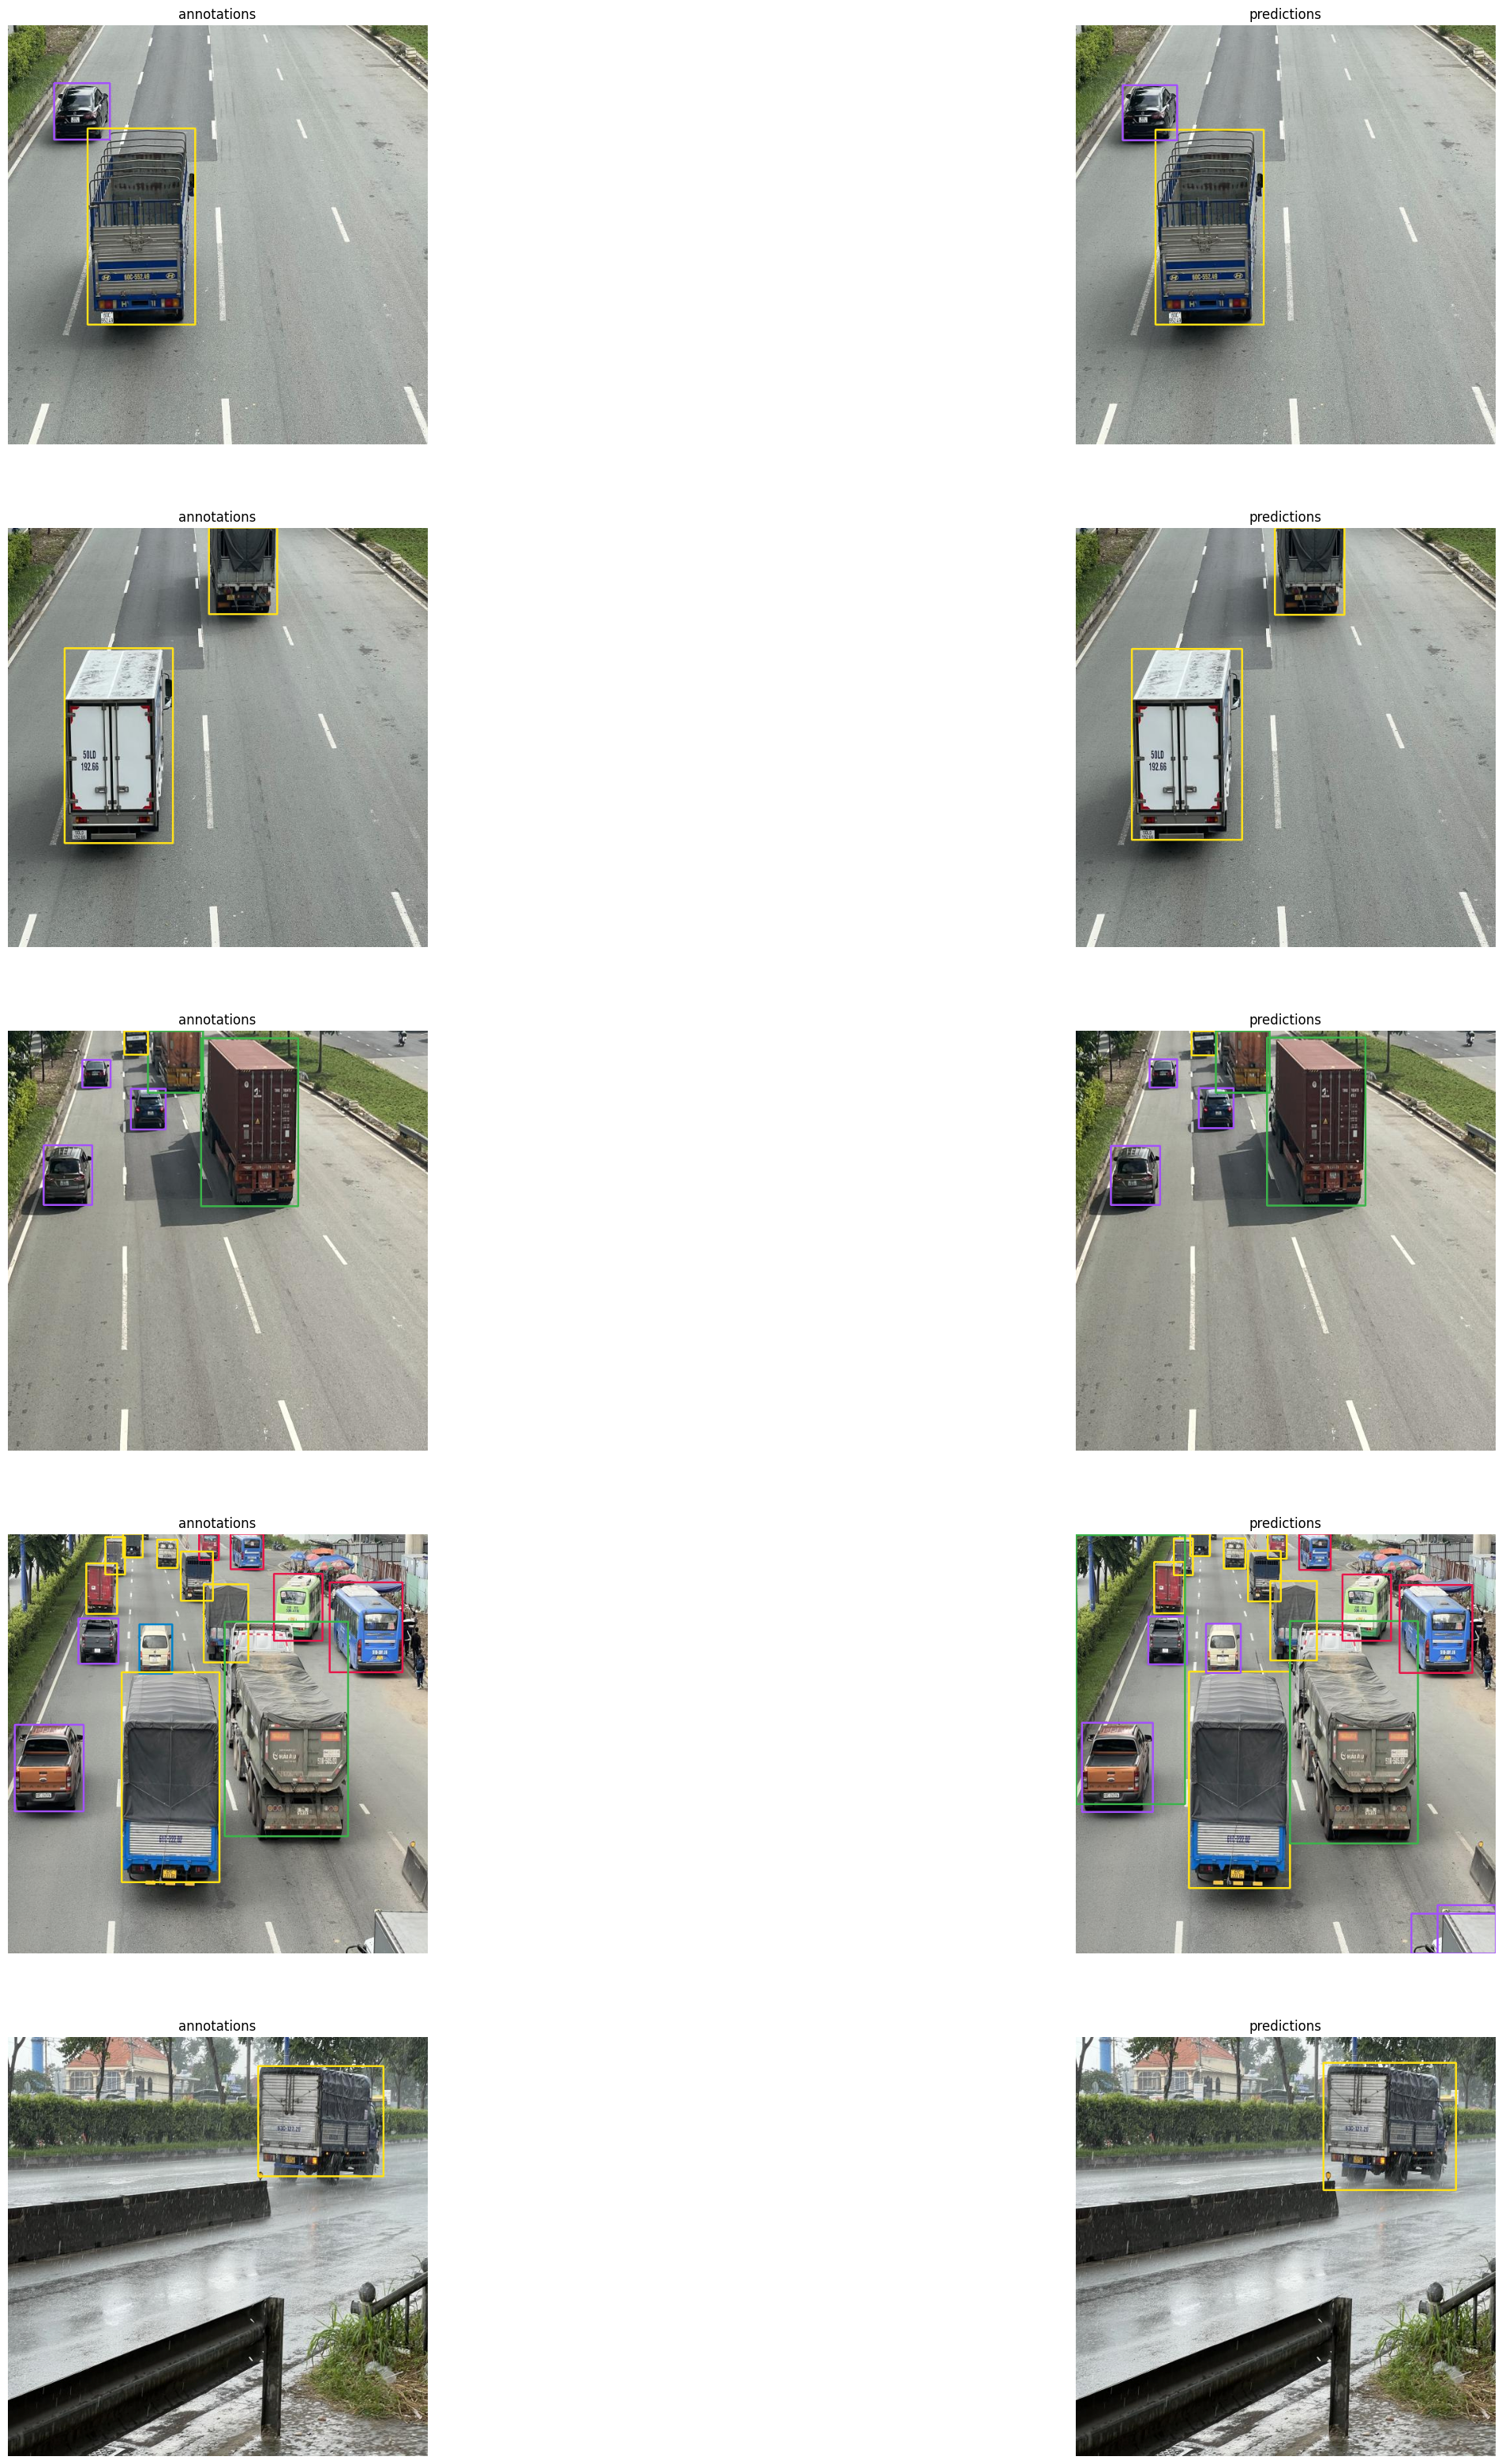

In [ ]:
import supervision as sv

n_images = 5

keys = list(ds.images.keys())
keys = random.sample(keys, n_images)

box_annotator = sv.BoxAnnotator()


images = []
titles = []

for key in keys:
    frame_with_annotations = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=ds.annotations[key],
         skip_label=True
    )
    images.append(frame_with_annotations)
    titles.append('annotations')
    frame_with_predictions = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=predictions[key],
        skip_label = True
    )
    images.append(frame_with_predictions)
    titles.append('predictions')

%matplotlib inline
sv.plot_images_grid(images=images, titles=titles, grid_size=(n_images, 2), size=(8 *4, n_images* 8))